# 1. 股票数据获取

## 1.1 基础数据获取

In [2]:
 # 获取股票代码
    q = query(valuation.code)

In [3]:
df = get_fundamentals(q)

In [4]:
df.shape

(4724, 1)

In [4]:
df.head()

,code
0,000001.XSHE
1,000002.XSHE
2,000004.XSHE
3,000005.XSHE
4,000006.XSHE


In [2]:
 # 要操作的股票：平安银行（g.为全局变量）
security = '000001.XSHE'

In [8]:
# 获取股票的100天长期收盘价
close_data = get_bars(security, count=100, unit='1d', fields=['close'])

In [11]:
close_data

array([(17.19,), (17.41,), (17.0,), (16.98,), (16.33,), (16.22,),
       (16.52,), (16.5,), (17.33,), (17.35,), (17.2,), (16.85,), (16.65,),
       (16.3,), (15.83,), (16.39,), (16.83,), (16.86,), (16.99,), (17.1,),
       (16.58,), (16.28,), (16.41,), (16.42,), (16.77,), (16.51,),
       (16.23,), (16.19,), (15.91,), (15.9,), (15.75,), (15.92,),
       (15.68,), (15.71,), (15.33,), (14.72,), (14.31,), (13.84,),
       (14.57,), (14.9,), (14.49,), (13.68,), (14.31,), (14.45,), (14.7,),
       (14.59,), (15.18,), (15.0,), (15.2,), (14.98,), (14.85,), (14.68,),
       (15.21,), (15.38,), (15.75,), (16.39,), (16.28,), (16.4,),
       (16.05,), (15.92,), (15.8,), (16.04,), (16.42,), (15.9,), (15.81,),
       (15.85,), (15.81,), (16.06,), (14.85,), (14.73,), (15.65,),
       (15.65,), (15.32,), (15.32,), (14.96,), (14.55,), (14.59,),
       (14.63,), (14.38,), (14.61,), (14.41,), (14.71,), (14.75,),
       (14.62,), (15.02,), (14.83,), (14.4,), (14.39,), (14.19,),
       (14.18,), (14.08,),

In [ ]:
# ===========================================

In [5]:
# 如果获取分钟数据， datatime.datetime(2019,1,1,10,0,0)或者'2019-01-01 10:00:00'
# end_date如果只有日期，则日内时间等同于00:00:00，则不包括end_date这一天
# frequency: daily(1天)， minute(1分钟)， Xd(x天), Xm(x分钟)
# fields：要获取的字段，默认['open', 'close', 'high', 'low', 'volume', 'money']
# skip_paused:是否跳过不交易日期（包括停牌、未上市或者退市后的日期），不跳过，
#    停牌是会使用停牌前的数据填充，上市前或退市后数据都为nan
# fq: pre: 前复权， None：不复权， post: 后复权
df = get_price(security, start_date='2022-03-01',end_date='2022-06-10', 
               frequency='daily', skip_paused=True, fq='pre')
df.head()

,open,close,high,low,volume,money
2022-03-01,15.79,15.92,15.95,15.62,93504034.0,1.474694e+09
2022-03-02,15.79,15.68,15.87,15.66,76076086.0,1.196322e+09
2022-03-03,15.73,15.71,15.81,15.63,57828505.0,9.081716e+08
2022-03-04,15.62,15.33,15.63,15.28,99093566.0,1.523794e+09
2022-03-07,15.17,14.72,15.17,14.66,111315899.0,1.655960e+09


## 1.2 数据操作

In [7]:
# 只显示 open, close, high
df[['open', 'close', 'high']].head()

,open,close,high
2022-03-01,15.79,15.92,15.95
2022-03-02,15.79,15.68,15.87
2022-03-03,15.73,15.71,15.81
2022-03-04,15.62,15.33,15.63
2022-03-07,15.17,14.72,15.17


In [9]:
# 选取open列数据, loc为location简写， loc[行标签，列标签]
df.loc[:, 'open'].head()

2022-03-01    15.79
2022-03-02    15.79
2022-03-03    15.73
2022-03-04    15.62
2022-03-07    15.17
Name: open, dtype: float64

In [12]:
# 获取3月1号数据
df.loc["2022-03-01"]

open      1.579000e+01
close     1.592000e+01
high      1.595000e+01
low       1.562000e+01
volume    9.350403e+07
money     1.474694e+09
Name: 2022-03-01 00:00:00, dtype: float64

In [13]:
df.loc["2022-03-01":"2022-03-03", "close"]

2022-03-01    15.92
2022-03-02    15.68
2022-03-03    15.71
Name: close, dtype: float64

In [14]:
# ===========================================
# 条件选择
# df[(df.one >= 1) & (df.one < 3)]
df[(df['close'] > 15.0) & (df['money'] < 1.35e+9)]

,open,close,high,low,volume,money
2022-03-02,15.79,15.68,15.87,15.66,76076086.0,1.196322e+09
2022-03-03,15.73,15.71,15.81,15.63,57828505.0,9.081716e+08
2022-04-19,15.90,15.81,15.97,15.62,82177249.0,1.294227e+09
2022-04-20,15.81,15.85,16.05,15.70,71655528.0,1.137698e+09
2022-04-21,15.77,15.81,15.98,15.70,70989116.0,1.124664e+09
2022-05-05,15.20,15.32,15.45,15.15,79019620.0,1.208735e+09


## 1.3 函数使用

In [15]:
# 利用std(), max(), min()计算标准偏差、最大和最小值
# 计算收盘价之和
df['close'].sum()

1018.3299999999999

## 1.4 均线值获取

In [6]:
# 获取倒数5天的收盘价
close_data['close'][-5:]

array([14.83, 14.4, 14.39, 14.19, 14.18])

In [7]:
# 获取5天的均值
MA5 = close_data['close'][-5:].mean()

In [8]:
MA5

14.398000000000001

# 2. 图形绘制

## 2.1 Dataframe直接绘图

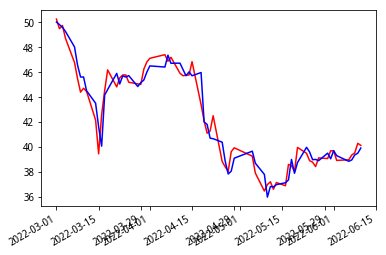

In [13]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
# 招商银行 600036.XSHG
df = get_price('600036.XSHG',start_date='2022-03-1', end_date='2022-06-10', frequency='daily')
df.close.plot(color='red')  # 绘制收盘价
df.open.plot(color='blue')  # 绘制开盘价

## 2.2 matplotlib绘图

In [16]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
# 招商银行 600036.XSHG
df = get_price('600036.XSHG',start_date='2022-03-1', end_date='2022-06-10', frequency='daily')
df.head()

,open,close,high,low,volume,money
2022-03-01,50.00,50.24,50.50,49.36,40645436.0,2.027738e+09
2022-03-02,49.80,49.47,50.23,49.44,39707598.0,1.972076e+09
2022-03-03,49.58,49.73,49.97,49.45,31128967.0,1.546032e+09
2022-03-04,49.25,48.70,49.39,48.50,57789720.0,2.818734e+09
2022-03-07,48.01,46.76,48.26,46.50,101435369.0,4.773666e+09


### 2.2.1 subplot函数

In [ ]:
# nrows 与 ncols 表示要划分几行几列的子区域（nrows*nclos表示子图数量），index 的初始值为1，用来选定具体的某个子区域。
# plt.subplot(nrows, ncols, index)，可以不要逗号进行缩写

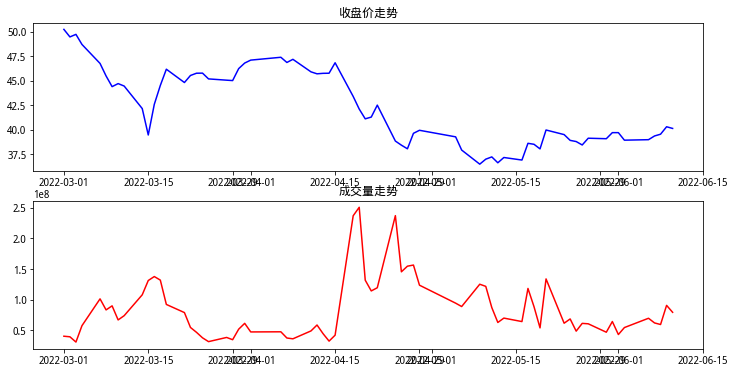

In [17]:
close = df['close']   # 收盘价
volume = df['volume']  # 成交量
plt.figure(figsize=[12, 6])
#激活第一个subplot
plt.subplot(2, 1, 1)   # nrows, ncols, index
plt.plot(close, "-b")  # 实线蓝色
plt.title('收盘价走势')
plt.subplot(2, 1, 2)
plt.plot(volume, "-r")  # 实现红色
plt.title('成交量走势')
plt.show()

### 2.2.2 add_axes()函数

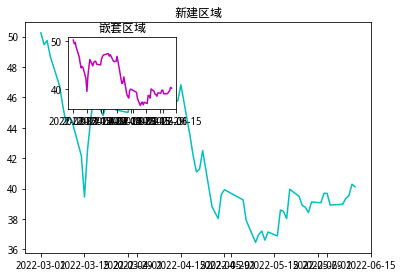

In [18]:
#新建figure
fig = plt.figure()
myc1 = df['close']   #收盘价
#新建区域ax1
#figure的百分比,从figure 10%的位置开始绘制, 宽高是figure的80%
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
# 获得绘制的句柄
ax1 = fig.add_axes([left, bottom, width, height])
ax1.plot(myc1, 'c')
ax1.set_title('新建区域')
#新增区域ax2,嵌套在ax1内
left, bottom, width, height = 0.2, 0.6, 0.25, 0.25
# 获得绘制的句柄
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(myc1, 'm')
ax2.set_title('嵌套区域')
plt.show()

### 2.2.3 legend()函数

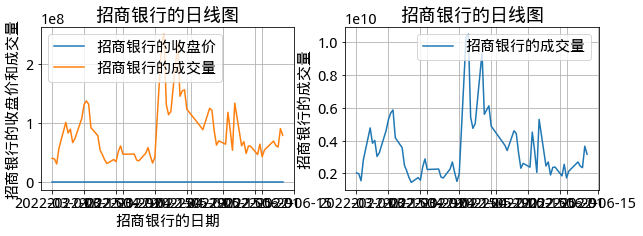

In [24]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
df = get_price('600036.XSHG',start_date='2022-03-1', end_date='2022-6-12', frequency='daily')
close = df['close']   #收盘价
volume = df['volume']   #成交量
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'serif'})
fig, axes = plt.subplots(1, 2, figsize=(10,3))
axes[0].plot(close, label="招商银行的收盘价")
axes[0].plot(volume, label="招商银行的成交量")
axes[0].legend(loc=2); # 左上角
axes[0].set_xlabel('招商银行的日期')
axes[0].set_ylabel('招商银行的收盘价和成交量')
axes[0].set_title('招商银行的日线图')
axes[0].grid(True)

money = df['money']   # 成交量
axes[1].plot(money, label="招商银行的成交量")
axes[1].legend(loc=0)
axes[0].set_xlabel('招商银行的日期')
axes[1].set_ylabel('招商银行的成交量')
axes[1].set_title('招商银行的日线图')
axes[1].grid(True)

参考原文链接：https://blog.csdn.net/Corollary/article/details/105391017

格式化字符
格式	样式
'-'	实线样式
'–'	短横线样式
'-.'	点划线样式
':'	虚线样式
'.'	点标记
','	像素标记
'o'	圆标记
'v'	倒三角标记
'^'	正三角标记
'<'	左三角标记
'>'	右三角标记
'1'	下箭头标记
'2'	上箭头标记
'3'	左箭头标记
'4'	右箭头标记
's'	正方形标记
'p'	五边形标记
'*'	星形标记
“h”	六边形标记 1
“H”	六边形标记 2
'+'	加号标记
“x”	X 标记
“D”	菱形标记
'd'	窄菱形标记
'|'	竖直线标记
'_'	水平线标记

常用色彩
代码	色彩
'b'	蓝色
'g'	绿色
'r'	红色
'c'	青色
'm'	品红色
“和”	黄色
'k'	黑色
“在”	白色

参考链接：https://www.jianshu.com/p/6b1dcb460f7a
matplotlib中的legend主要用来设置图例相关的内容，其中loc用来表示图例的具体位置，他的可选的参数可以是字符，也可以是数字，默认情况下是0（即best），参数及意思如下：
0: ‘best’ （自动寻找最好的位置）
1: ‘upper right’ （右上角）
2: ‘upper left’ （左上角）
3: ‘lower left’ （左下角）
4: ‘lower right’ （右下角）
5: ‘right’ （右边中间）
6: ‘center left’ （左边中间）
7: ‘center right’ （右边中间）
8: ‘lower center’ （中间最下面）
9: ‘upper center’ （中间最上面）
10: ‘center’ （正中心)